Read Radio Sonde data

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xr.set_options(keep_attrs = True, display_expand_data = False)
np.set_printoptions(threshold=10, edgeitems=2)

%xmode minimal
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
# Replace with the actual path to your radiosonde NetCDF file
vaisala_file_path = "D:\\Data\\ekam-radiosonde-data\\rs_sn191.nc"

azista_file_path = "test_azista_modified.csv"
df = pd.read_csv(azista_file_path)

# Open the NetCDF file
ds = xr.open_dataset(vaisala_file_path)

# Print dataset summary
ds

In [3]:
# Pull out and Define Individual Variables with proper Names
# Access temperature
da_temperature = ds['Temp']

# Access wind speed
da_pressure = ds["Press"]

# Due Point Temperature
da_due_point = ds["Td"]

# Mixing Ratio 
da_mixing_ratio = ds["MixR"]

# Wind Direction 
da_dd = ds["DD"]

# Wind Speed
da_dd = ds["FF"]


# Plot temperature vs level
# temperature.plot(y=pressure)
# plt.plot(temperature,pressure)
#print(temperature.z)

In [ ]:
da_temp = ds.Temp
z_var = ds.z
t_var = ds.t 
da_temp.dims
da_temp.coords

In [ ]:
# ds.Longitude
# ds.Latitude
da_temp.coords["t"]

In [ ]:
da_temp.attrs["Temperature_Units"] = "DegC"
da_temp.data

In [ ]:
lat = ds.Latitude
lon = ds.Longitude
lat.data
lon.data

In [25]:
launch_num_82 = ds.isel(t=82)
#launch_num_1 = ds.isel(t=1)

In [26]:
temperature = launch_num_82['Temp']
pressure = launch_num_82['Press']
humidity = launch_num_82['Hum']
height = launch_num_82['z']
due_point_T = launch_num_82['Td'] 
mixing_ratio = launch_num_82['MixR']
wind_direction = launch_num_82['DD']
wind_speed = launch_num_82['FF']


In [34]:
print(df.columns)

Index(['time_stamp', 'gph_gnss', 'gph_press', 'press_gnss', 'press_sens',
       'temp_air', 'dew_point', 'rh', 'wind_speed', 'wind_dir', 'lat', 'lon',
       'alt'],
      dtype='object')


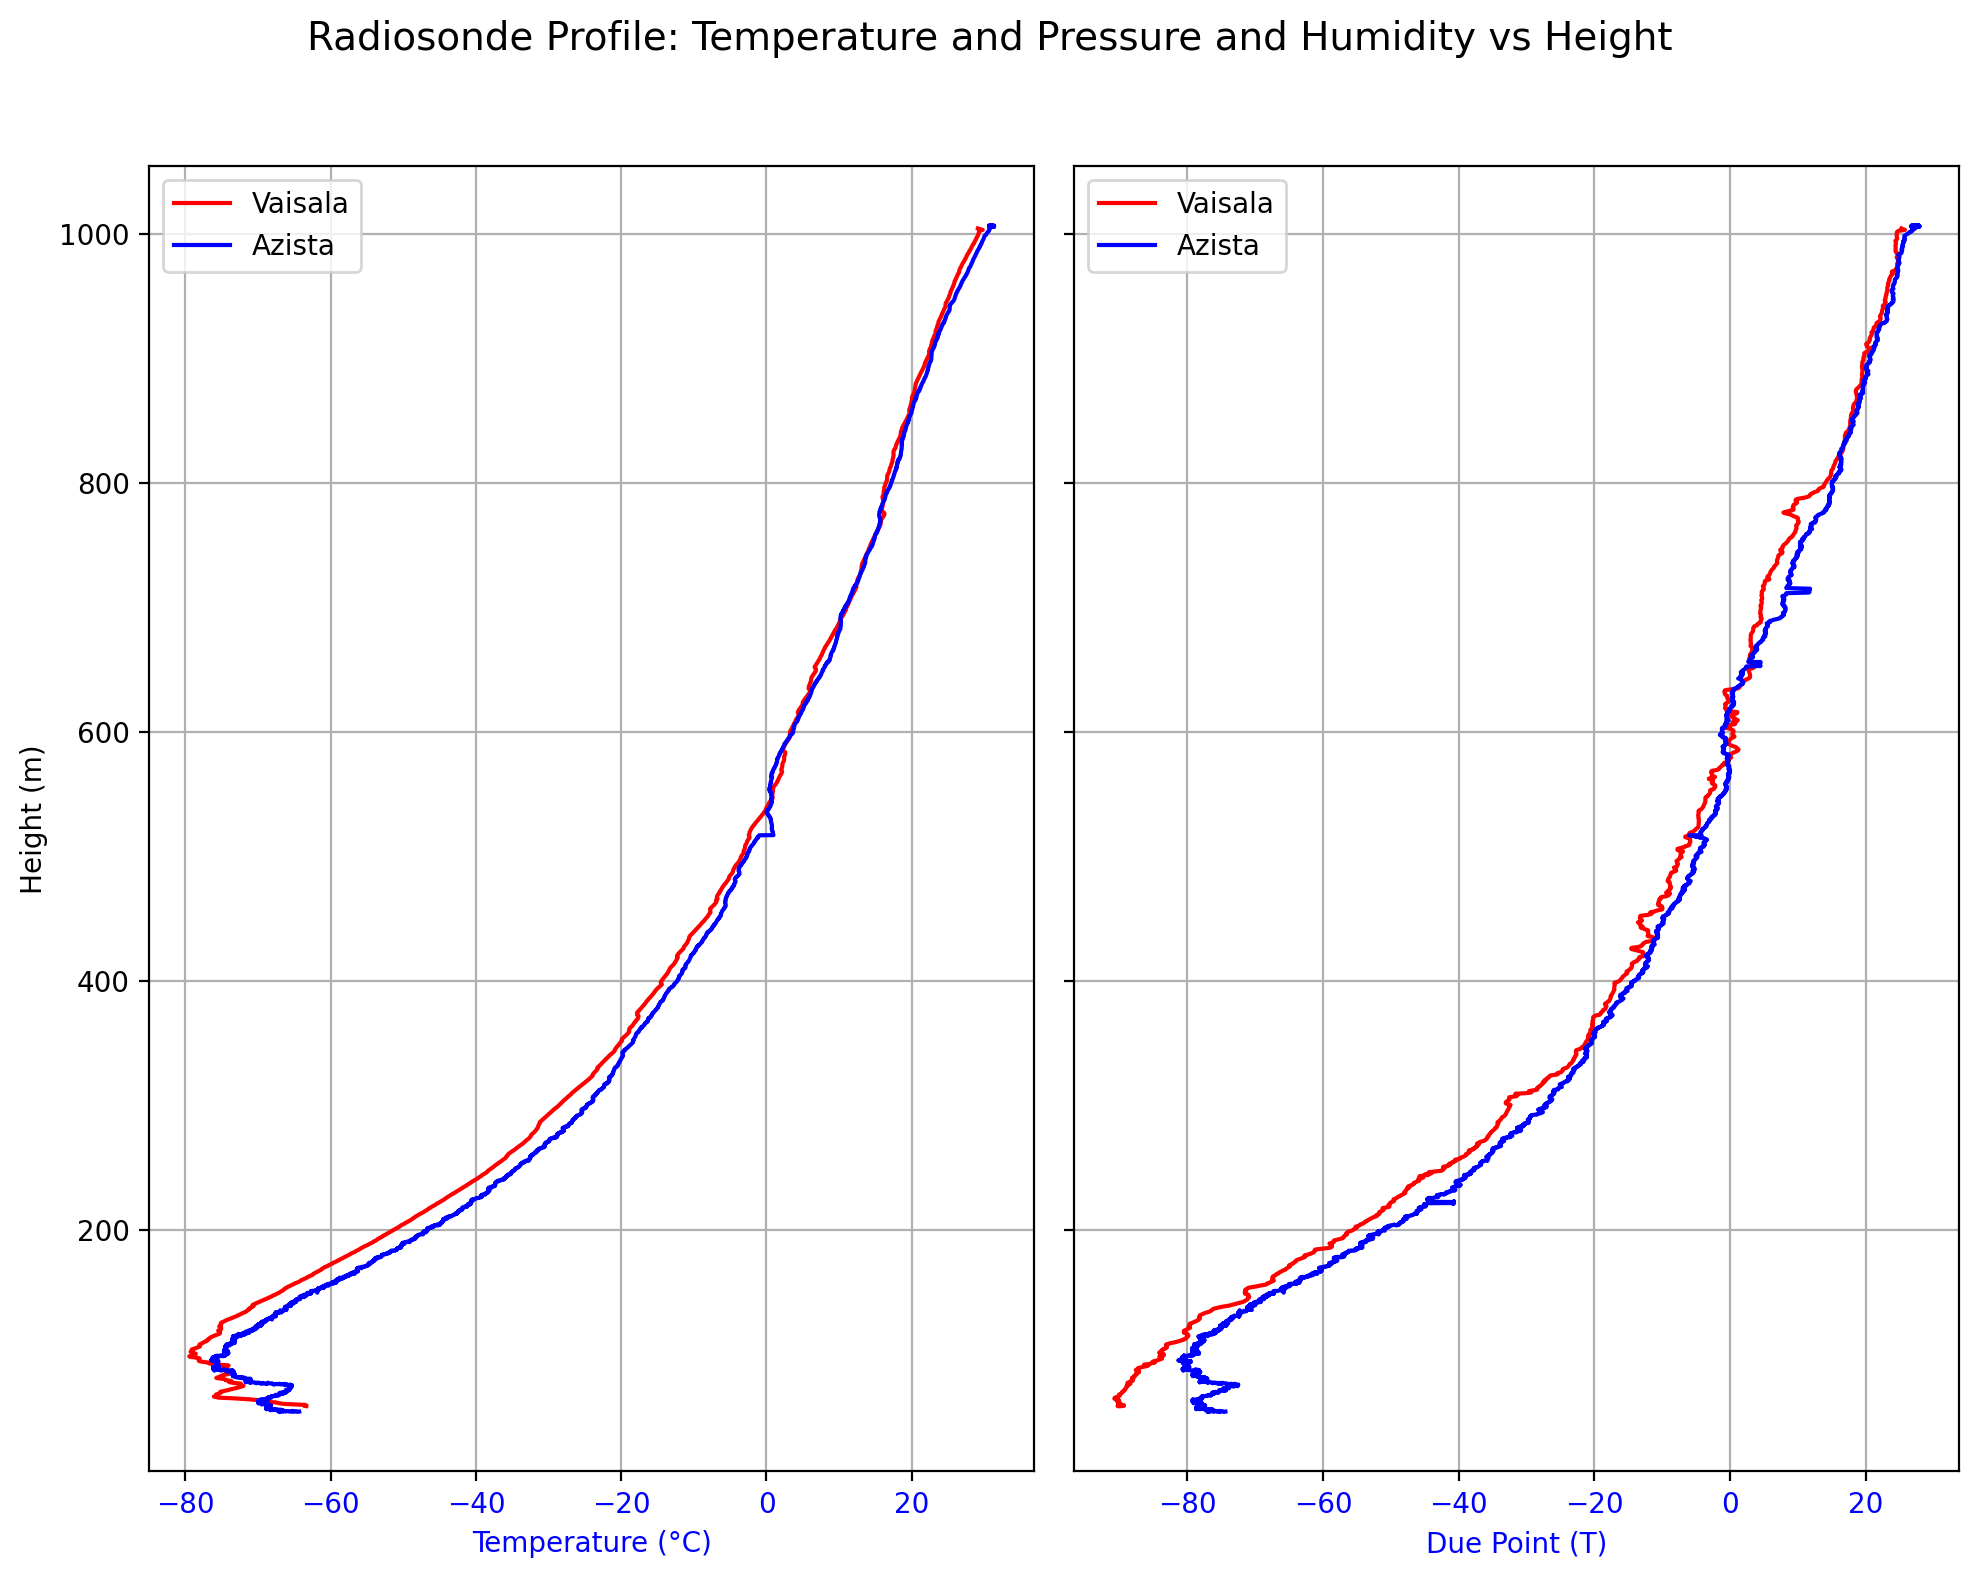

In [40]:
import matplotlib.pyplot as plt

# Example variables (replace these with your actual data)
# height = profile_i['height'].values
# temperature = profile_i['temperature'].values
# pressure = profile_i['pressure'].values

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), sharey=True)

# Temperature plot
ax1.plot(temperature, pressure, 'r-', label='Vaisala')
ax1.set_xlabel('Temperature (°C)', color='r')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='x', labelcolor='r')
ax1.grid(True)

ax1.plot(df['temp_air'], df['press_sens'], 'b-', label='Azista')
ax1.set_xlabel('Temperature (°C)', color='b')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='x', labelcolor='b')
ax1.grid(True)
ax1.legend()
#x1.invert_yaxis()  # Optional: height increasing upwards

# Due Point Plot
ax2.plot(due_point_T, pressure, 'r-', label='Vaisala')
ax2.set_xlabel('Due Point (T)', color='r')
ax2.tick_params(axis='x', labelcolor='r')
ax2.grid(True)

ax2.plot(df['dew_point'], df['press_sens'], 'b-', label='Azista')
ax2.set_xlabel('Due Point (T)', color='b')
ax2.tick_params(axis='x', labelcolor='b')
ax2.grid(True)
ax2.legend()
#ax2.invert_yaxis()  # Optional: height increasing upwards

fig.suptitle('Radiosonde Profile: Temperature and Pressure and Humidity vs Height', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()

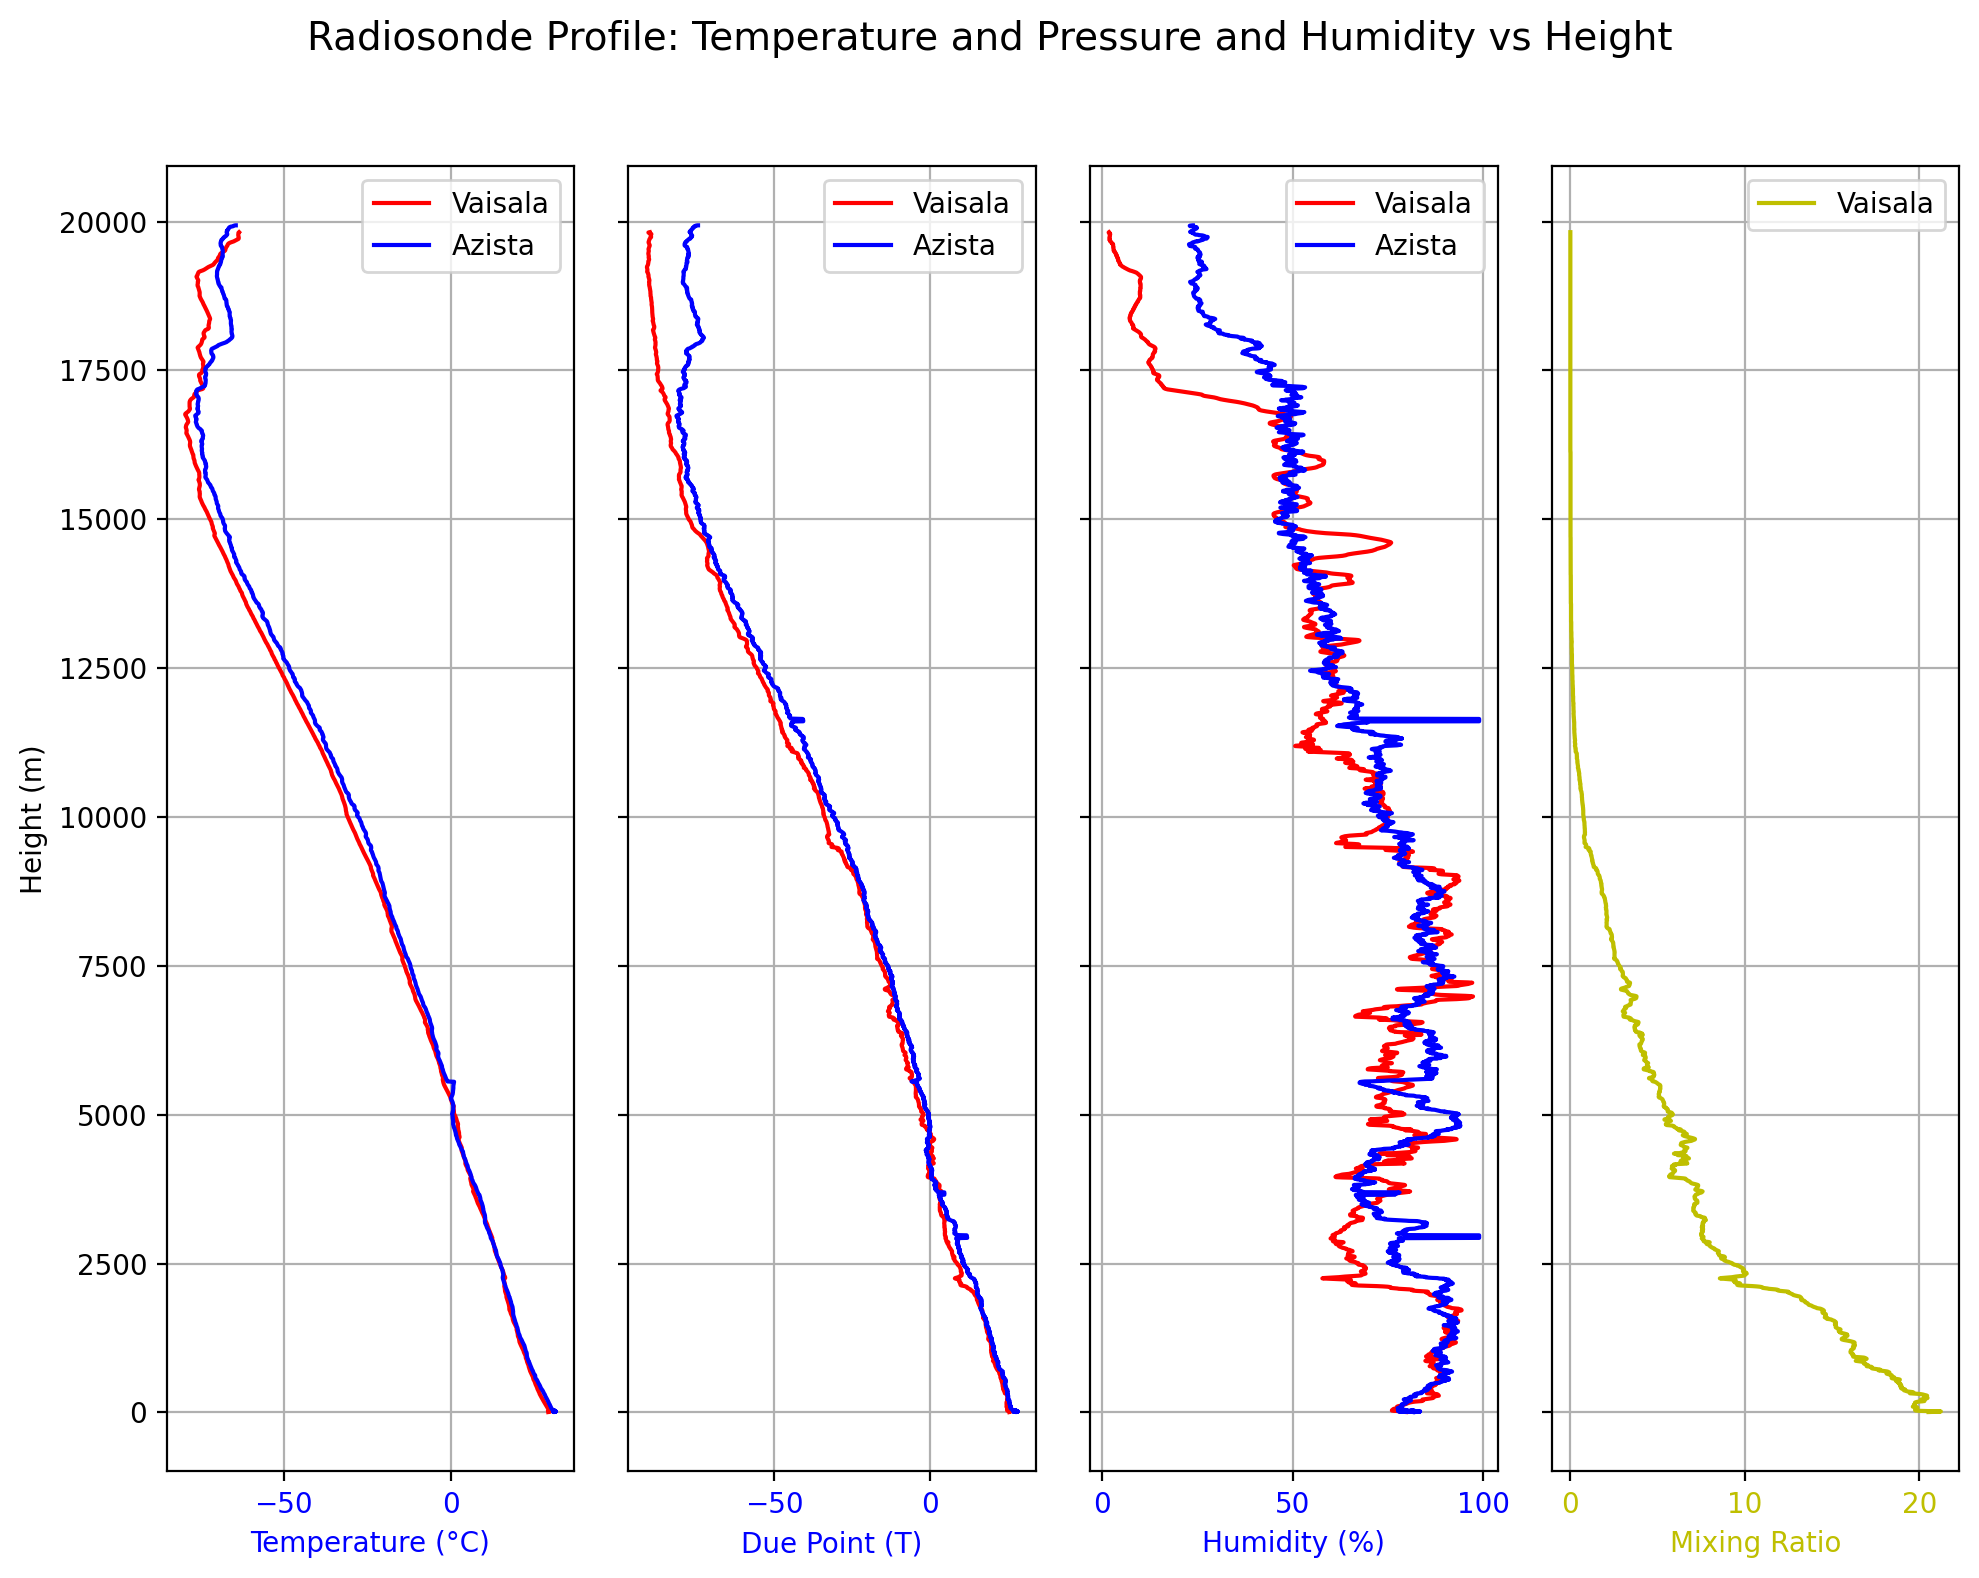

In [33]:
import matplotlib.pyplot as plt

# Example variables (replace these with your actual data)
# height = profile_i['height'].values
# temperature = profile_i['temperature'].values
# pressure = profile_i['pressure'].values

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(10, 8), sharey=True)

# Temperature plot
ax1.plot(temperature, height, 'r-', label='Vaisala')
ax1.set_xlabel('Temperature (°C)', color='r')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='x', labelcolor='r')
ax1.grid(True)

ax1.plot(df['temp_air'], df['alt'], 'b-', label='Azista')
ax1.set_xlabel('Temperature (°C)', color='b')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='x', labelcolor='b')
ax1.grid(True)
ax1.legend()
#ax1.invert_yaxis()  # Optional: height increasing upwards

# # Pressure plot
# ax2.plot(pressure, height, 'b--')
# ax2.set_xlabel('Pressure (hPa)', color='b')
# ax2.tick_params(axis='x', labelcolor='b')
# ax2.grid(True)

# Due Point Plot
ax2.plot(due_point_T, height, 'r-', label='Vaisala')
ax2.set_xlabel('Due Point (T)', color='r')
ax2.tick_params(axis='x', labelcolor='r')
ax2.grid(True)

ax2.plot(df['dew_point'], df['alt'], 'b-', label='Azista')
ax2.set_xlabel('Due Point (T)', color='b')
ax2.tick_params(axis='x', labelcolor='b')
ax2.grid(True)
ax2.legend()


# Humidity plot
ax3.plot(humidity, height, 'r-', label='Vaisala')
ax3.set_xlabel('Humidity (%)', color='r')
ax3.tick_params(axis='x', labelcolor='r')
ax3.grid(True)

ax3.plot(df['rh'], df['alt'], 'b-', label='Azista')
ax3.set_xlabel('Humidity (%)', color='b')
ax3.tick_params(axis='x', labelcolor='b')
ax3.grid(True)
ax3.legend()

# Mixing Ratio Plot

# ax4.plot(wind_speed, height, 'r-')
# ax4.set_xlabel('Wind Direction', color='r')
# ax4.tick_params(axis='x', labelcolor='r')
# ax4.grid(True)

# ax4.plot(df['wind_speed'], df['alt'], 'b-')
# ax4.set_xlabel('Wind Direction', color='b')
# ax4.tick_params(axis='x', labelcolor='b')
# ax4.grid(True)


ax4.plot(mixing_ratio, height, 'y-', label='Vaisala')
ax4.set_xlabel('Mixing Ratio', color='y')
ax4.tick_params(axis='x', labelcolor='y')
ax4.grid(True)
ax4.legend()

# Title and layout


fig.suptitle('Radiosonde Profile: Temperature and Pressure and Humidity vs Height', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()

In [ ]:
plt.figure()
plt.plot(temperature, height)
plt.plot(humidity, height)

plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# Example variables (replace these with your actual data)
# height = profile_i['height'].values
# temperature = profile_i['temperature'].values
# pressure = profile_i['pressure'].values

fig, ax1 = plt.subplots(figsize=(8, 10))

# Plot temperature on the bottom x-axis
ax1.plot(temperature, height, 'r-', label='Temperature')
ax1.set_xlabel('Temperature (°C)', color='r')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='x', labelcolor='r')
#ax1.invert_yaxis()  # Optional: if you want height increasing upward

# Create a second x-axis on top for pressure
ax2 = ax1.twiny()
ax2.plot(pressure, height, 'b--', label='Pressure')
ax2.set_xlabel('Pressure (hPa)', color='b')
ax2.tick_params(axis='x', labelcolor='b')

# Grid and title
ax1.grid(True)
plt.title('Radiosonde Profile: Temperature and Pressure vs Height')

plt.tight_layout()
plt.show()


## Sample Code Snippets Below

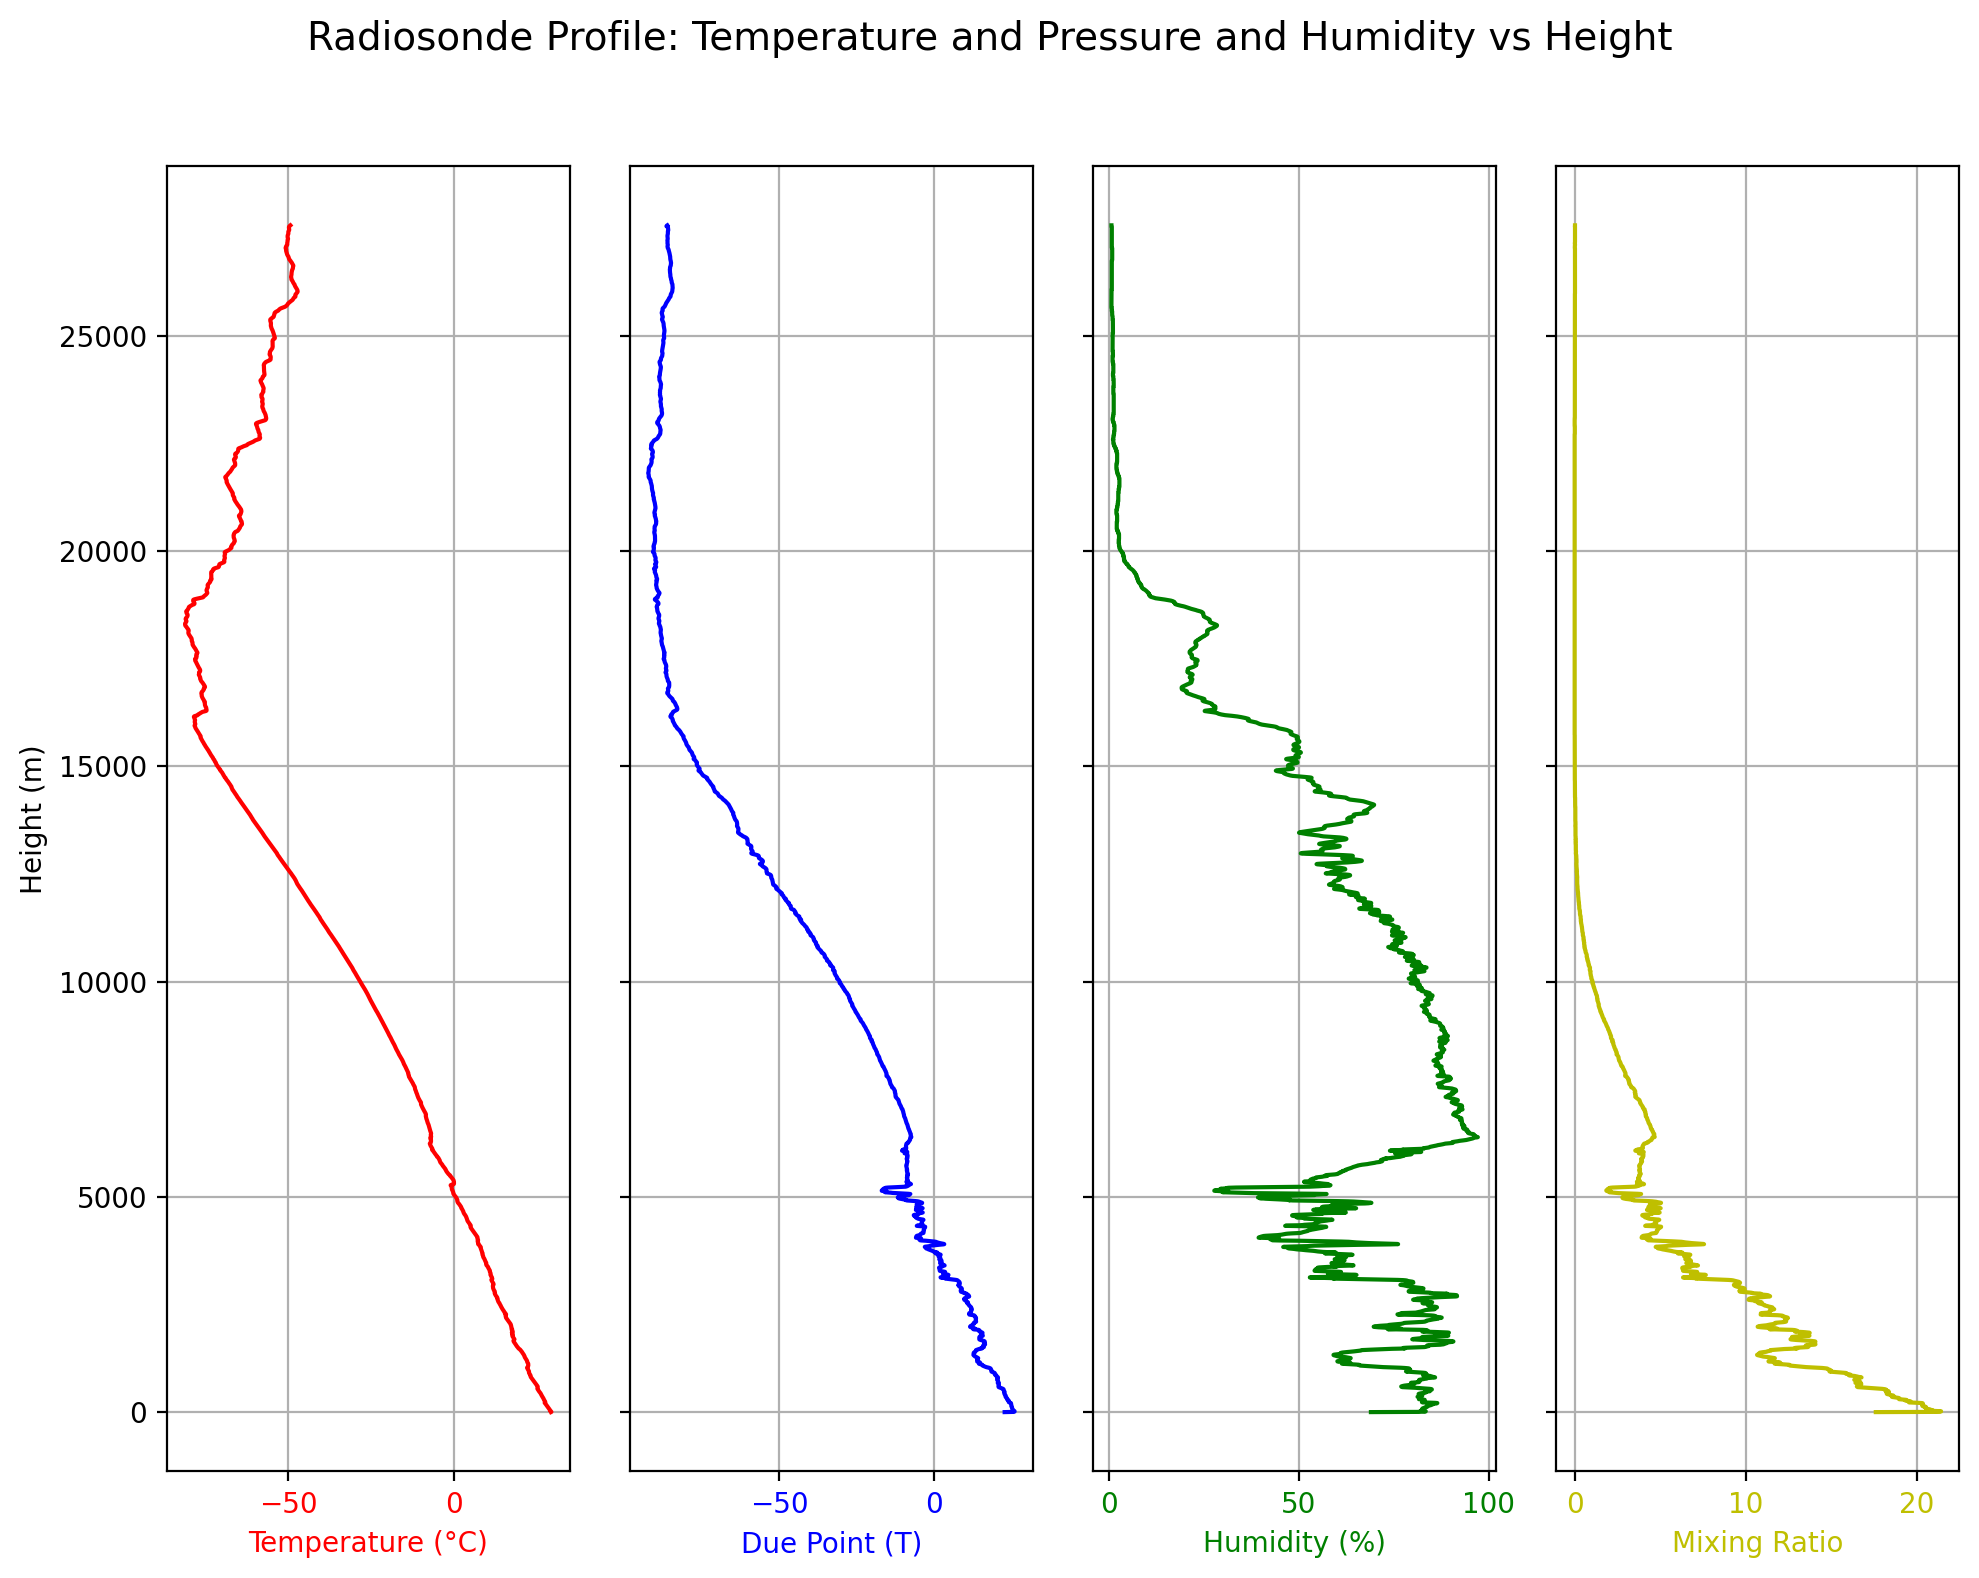

In [59]:
## Backup Code

import matplotlib.pyplot as plt

# Example variables (replace these with your actual data)
# height = profile_i['height'].values
# temperature = profile_i['temperature'].values
# pressure = profile_i['pressure'].values

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(10, 8), sharey=True)

# Temperature plot
ax1.plot(temperature, height, 'r-')
ax1.set_xlabel('Temperature (°C)', color='r')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='x', labelcolor='r')
ax1.grid(True)
#ax1.invert_yaxis()  # Optional: height increasing upwards

# # Pressure plot
# ax2.plot(pressure, height, 'b--')
# ax2.set_xlabel('Pressure (hPa)', color='b')
# ax2.tick_params(axis='x', labelcolor='b')
# ax2.grid(True)

# Due Point Plot
ax2.plot(due_point_T, height, 'b-')
ax2.set_xlabel('Due Point (T)', color='b')
ax2.tick_params(axis='x', labelcolor='b')
ax2.grid(True)

# Humidity plot
ax3.plot(humidity, height, 'g-')
ax3.set_xlabel('Humidity (%)', color='g')
ax3.tick_params(axis='x', labelcolor='g')
ax3.grid(True)

# Mixing Ratio Plot
ax4.plot(mixing_ratio, height, 'y-')
ax4.set_xlabel('Mixing Ratio', color='y')
ax4.tick_params(axis='x', labelcolor='y')
ax4.grid(True)

# Title and layout
fig.suptitle('Radiosonde Profile: Temperature and Pressure and Humidity vs Height', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()

In [ ]:
# Sample Code Files

import xarray as xr
import pandas as pd

# Load the NetCDF file
file_path = "your_radiosonde_file.nc"
ds = xr.open_dataset(file_path)

# Example: Convert selected variables (e.g., temperature, pressure, relative humidity) into a DataFrame
df = ds[['temperature', 'pressure', 'relative_humidity']].to_dataframe().reset_index()

# Show the DataFrame
print(df.head())


In [ ]:
# Convert just the temperature profile to a pandas Series
temperature_series = ds['temperature'].to_series()

# Show the Series
print(temperature_series.head())


In [25]:
# Filter DataFrame for a specific pressure level (e.g., 850 hPa)
df_850 = df[df['level'] == 850]
print(df_850)

KeyError: 'level'

# Reading Azista Data

Index(['time_stamp', 'gph_gnss', 'gph_press', 'press_gnss', 'press_sens',
       'temp_air', 'dew_point', 'rh', 'wind_speed', 'wind_dir', 'lat', 'lon',
       'alt'],
      dtype='object')

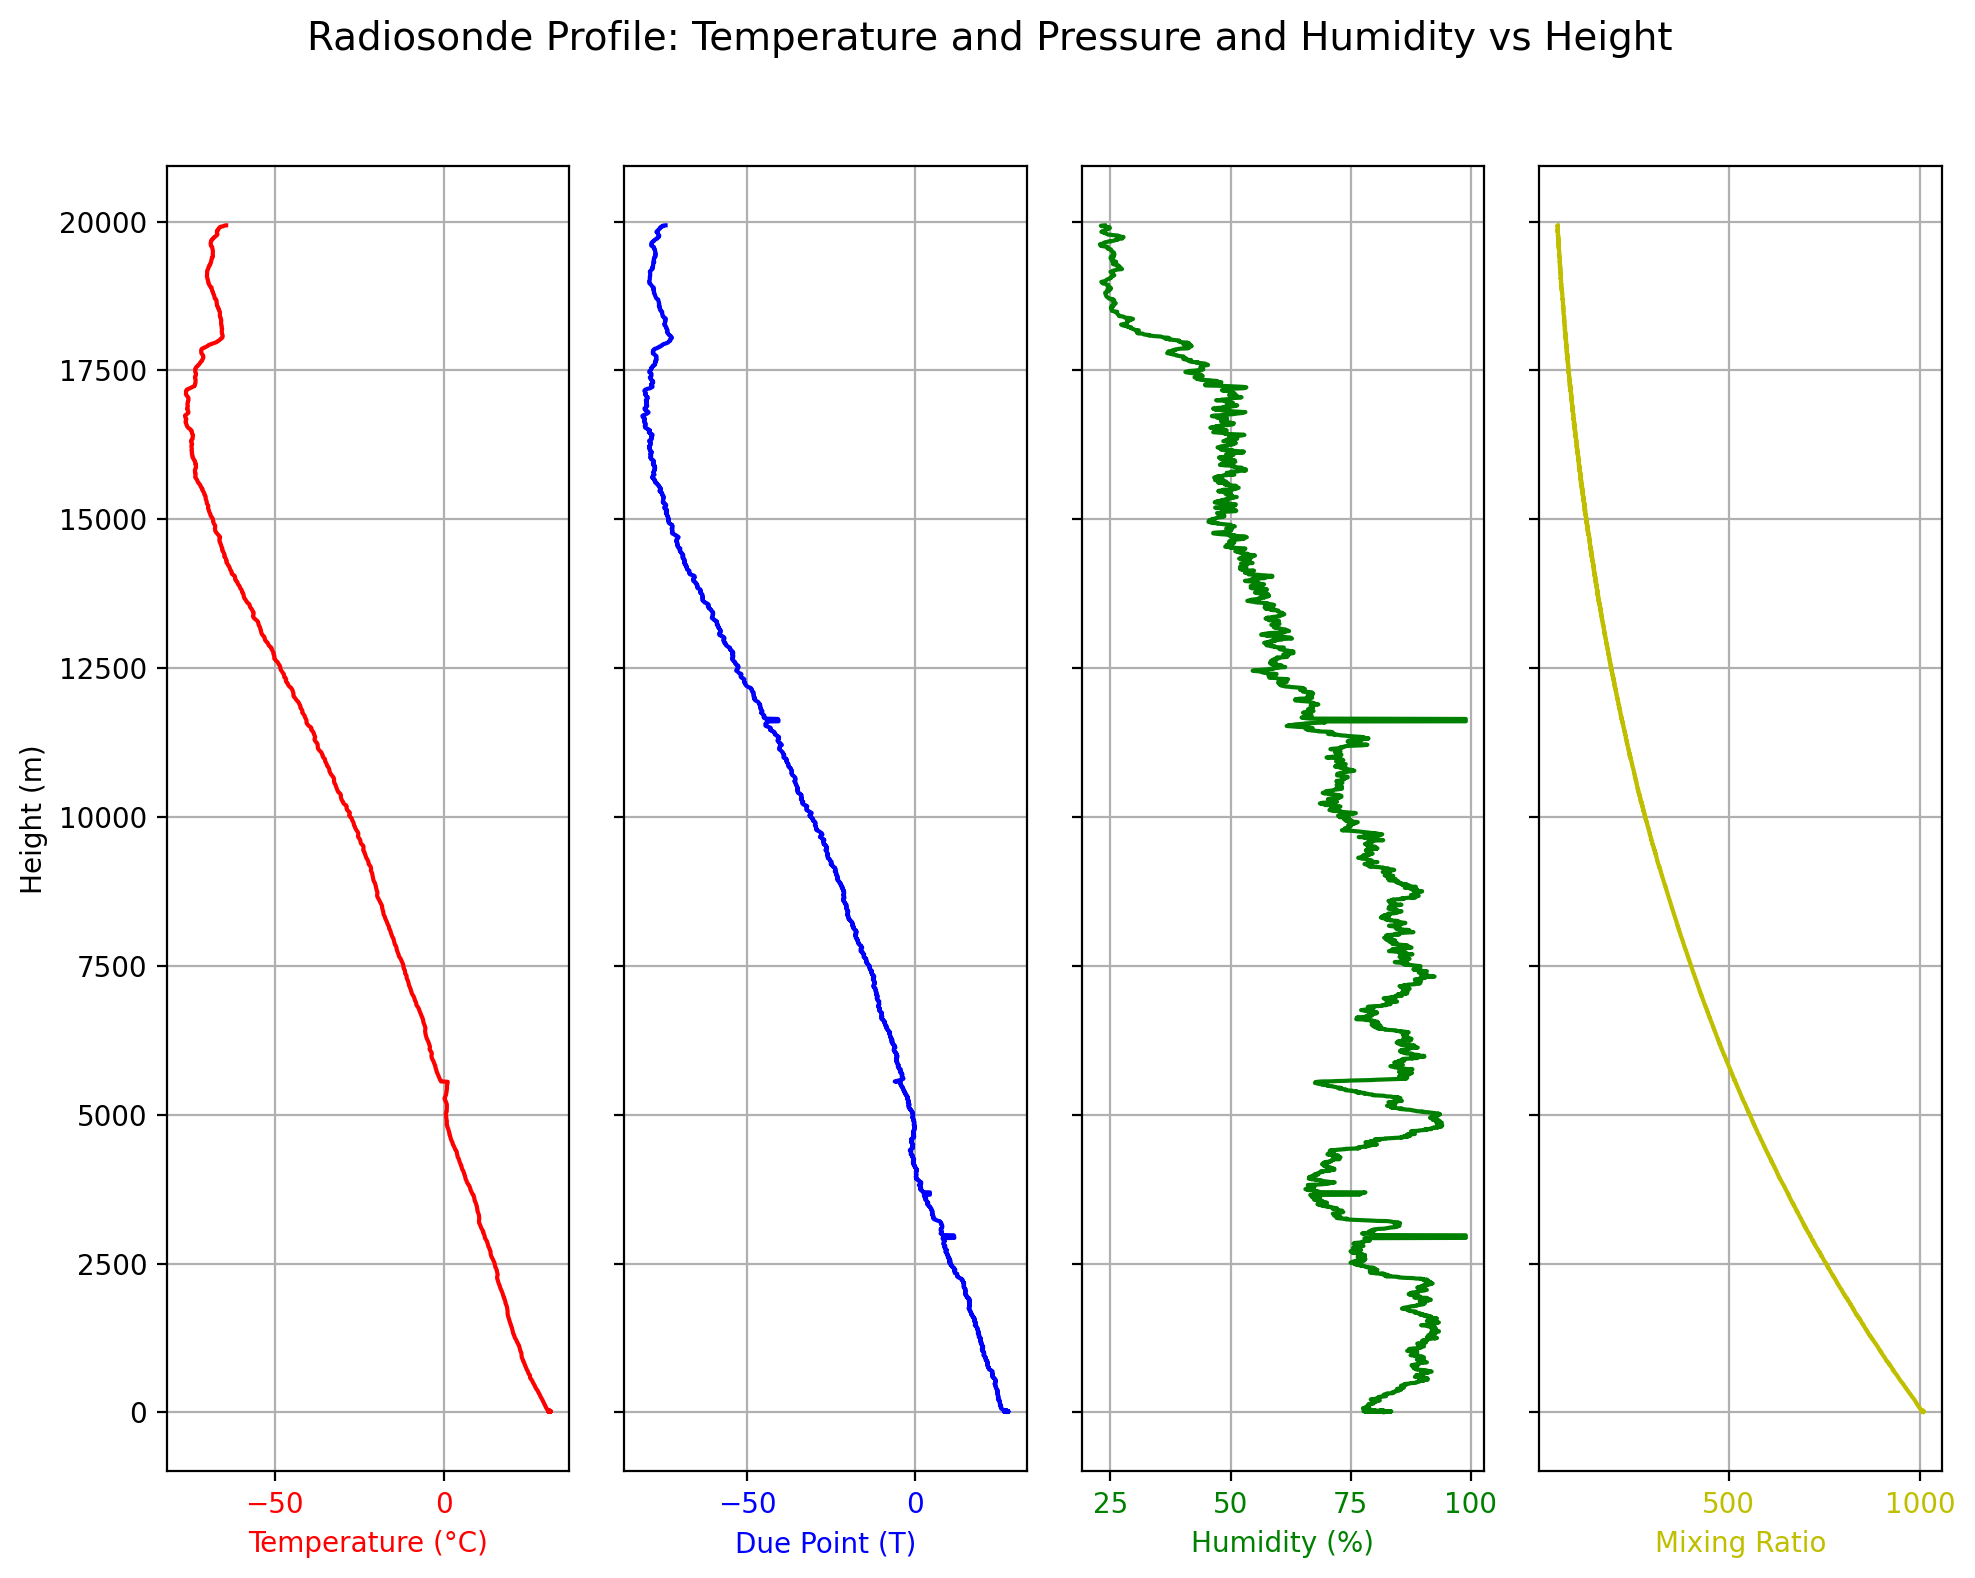

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(10, 8), sharey=True)

# Temperature plot
ax1.plot( df['temp_air'], df['alt'], 'r-')
ax1.set_xlabel('Temperature (°C)', color='r')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='x', labelcolor='r')
ax1.grid(True)
#ax1.invert_yaxis()  # Optional: height increasing upwards

# # Pressure plot
# ax2.plot(pressure, height, 'b--')
# ax2.set_xlabel('Pressure (hPa)', color='b')
# ax2.tick_params(axis='x', labelcolor='b')
# ax2.grid(True)

# Due Point Plot
ax2.plot(df['dew_point'], df['alt'], 'b-')
ax2.set_xlabel('Due Point (T)', color='b')
ax2.tick_params(axis='x', labelcolor='b')
ax2.grid(True)

# Humidity plot
ax3.plot(df['rh'], df['alt'], 'g-')
ax3.set_xlabel('Humidity (%)', color='g')
ax3.tick_params(axis='x', labelcolor='g')
ax3.grid(True)

# Mixing Ratio Plot
ax4.plot(df['press_sens'], df['alt'], 'y-')
ax4.set_xlabel('Mixing Ratio', color='y')
ax4.tick_params(axis='x', labelcolor='y')
ax4.grid(True)

# Title and layout
fig.suptitle('Radiosonde Profile: Temperature and Pressure and Humidity vs Height', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()

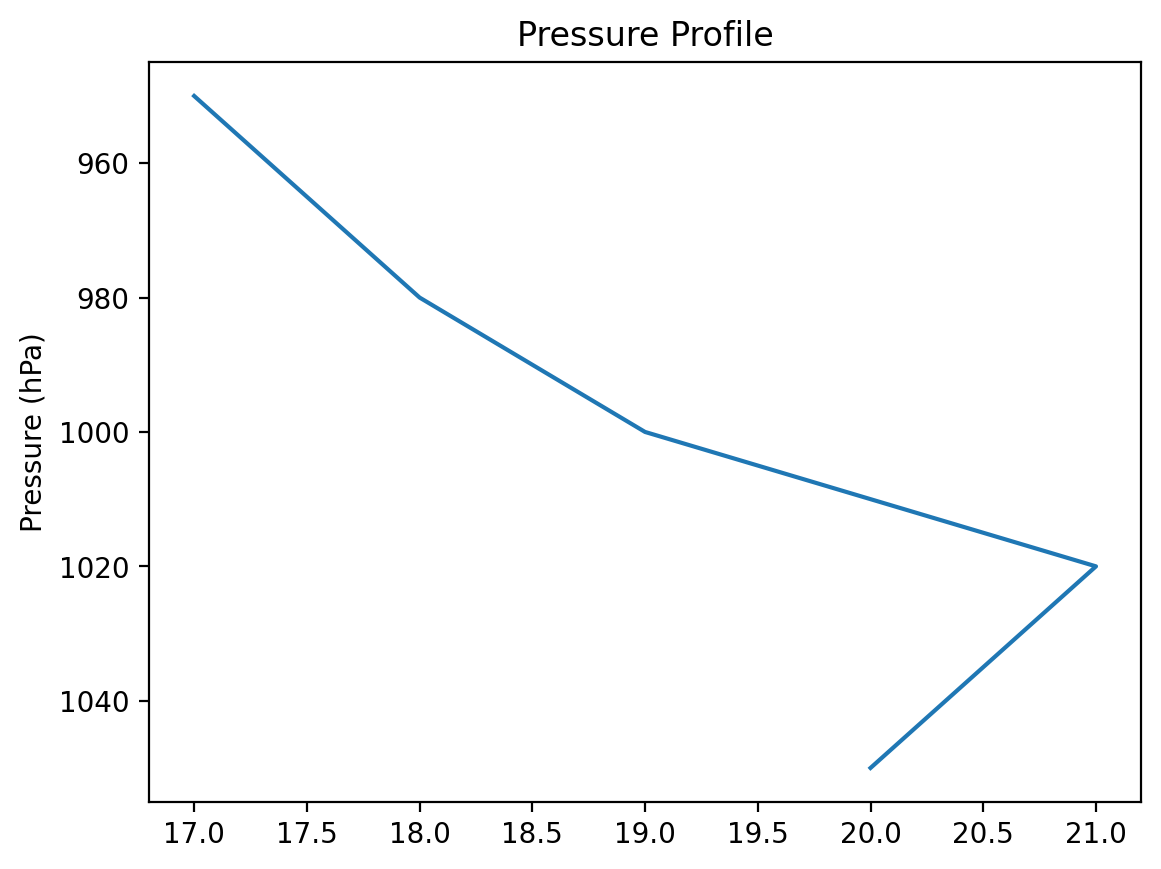

In [42]:
import matplotlib.pyplot as plt

# Example data
depth = [0, 1, 2, 3, 4]
pressure = [1050, 1020, 1000, 980, 950]

plt.plot([20, 21, 19, 18, 17], pressure)

plt.gca().invert_yaxis()              # Invert y-axis
plt.ylabel('Pressure (hPa)')          # Label the axis
plt.title('Pressure Profile')

plt.show()


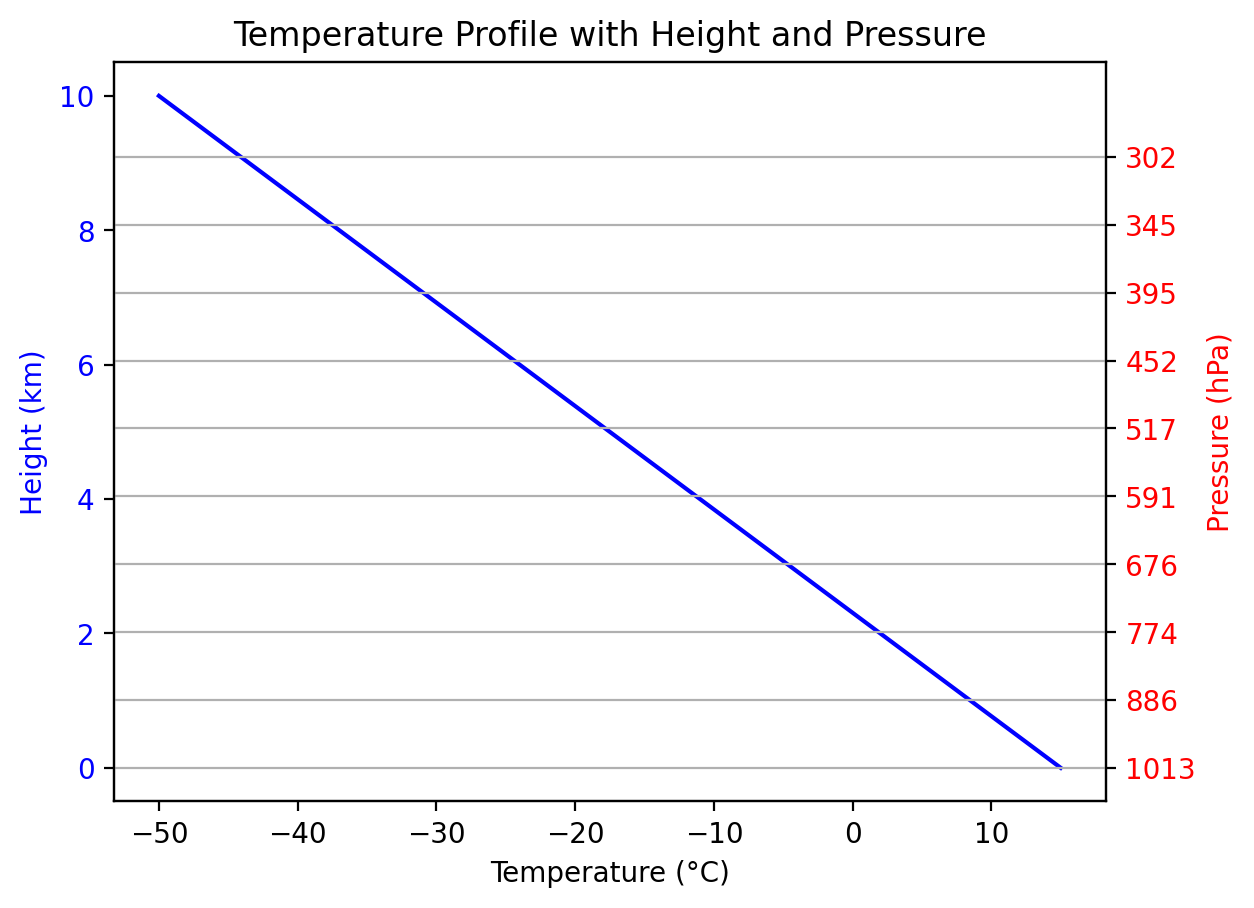

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Example height in km
height_km = np.linspace(0, 10, 100)

# Approximate pressure (hPa) using an exponential decrease with height
# P = P0 * exp(-h / H), where H ≈ 7.5 km
P0 = 1013.25  # sea level pressure in hPa
H = 7.5       # scale height in km
pressure = P0 * np.exp(-height_km / H)

# Some fake temperature profile
temperature = 15 - 6.5 * height_km  # linear lapse rate

fig, ax1 = plt.subplots()

# Plot temperature vs. height
ax1.plot(temperature, height_km, 'b-')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Height (km)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for pressure
ax2 = ax1.twinx()
ax2.set_ylabel('Pressure (hPa)', color='r')
ax2.set_ylim(ax1.get_ylim())  # sync height range
ax2.set_yticks(height_km[::10])  # fewer ticks
ax2.set_yticklabels([f'{p:.0f}' for p in pressure[::10]])  # match pressure
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Temperature Profile with Height and Pressure')
plt.grid()
plt.show()
